# Computing the sum of squared errors

Author: Pierre Nugues

In this notebook, we visualize the sum of squared errors of a regression as a function of the weight parameters.

In [1]:
import math

import matplotlib.pyplot as plt
import torch
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib inline

## The dataset

The data set: _Salammbô_ in French with three columns: the counts of characters, counts of _a_ and _e_

In [3]:
dataset = torch.tensor([[36961, 2503, 4312],
                    [43621, 2992, 4993],
                    [15694, 1042, 1785],
                    [36231, 2487, 4158],
                    [29945, 2014, 3394],
                    [40588, 2805, 4535],
                    [75255, 5062, 8512],
                    [37709, 2643, 4229],
                    [30899, 2126, 3599],
                    [25486, 1784, 3002],
                    [37497, 2641, 4306],
                    [40398, 2766, 4618],
                    [74105, 5047, 8678],
                    [76725, 5312, 8870],
                    [18317, 1215, 2195]])

## The sum of the absolute errors
We have $\hat{y} = mx + b$ and we compute $\sum |\hat{y} - y|$ for all the values of $m$ and $b$.

In [4]:
def sum_absolute_errors(X, y, w):
    """
    Sum of the squared errors:
    Prediction: X.w = ŷ
    Error (loss): |y - ŷ|
    :param X: The input matrix: The predictors
    :param y: The output vector: The response
    :param w: The weight vector: The model
    :return: The error
    """
    return torch.sum(torch.abs(y - X @ w))

## Computing the surfaces

We use a logathmic scale

In [5]:
def compute_3d_matrices(X, y):
    """
    Compute the 3D matrix of errors
    Axes x and y, the weights
    Axis z the error
    :param X:
    :param y:
    :return:
    """

    w0_range = torch.linspace(-1000, 1000, 100)
    w1_range = torch.linspace(0, 0.15, 100)
    x_axis, y_axis = torch.meshgrid(w0_range, w1_range, indexing='xy')
    z_axis = torch.tensor([math.log10(sum_absolute_errors(X, y, torch.tensor([w0, w1])))
                       for w0 in w0_range for w1 in w1_range])
    z_axis = z_axis.reshape(x_axis.shape)
    return x_axis, y_axis, z_axis

## Plotting the surfaces

In [6]:
def plot(X, y, color):
    X, Y, Z = compute_3d_matrices(X, y)
    surf = ax.plot_surface(Y, X, Z, rstride=1, cstride=1, cmap=color,
                           linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)

## Extracting the matrices

We extract the matrices and we pad them with a column of ones for the lintercept $w_0$

In [7]:
X_a, y_a = dataset[:,0:1], dataset[:,1]
X_e, y_e = dataset[:,0:1], dataset[:,2]

In [8]:
n_rows = dataset.shape[0]
n_rows

15

In [9]:
X_a = torch.hstack((torch.ones((n_rows, 1)), X_a))
X_e = torch.hstack((torch.ones((n_rows, 1)), X_e))

In [10]:
X_a

tensor([[1.0000e+00, 3.6961e+04],
        [1.0000e+00, 4.3621e+04],
        [1.0000e+00, 1.5694e+04],
        [1.0000e+00, 3.6231e+04],
        [1.0000e+00, 2.9945e+04],
        [1.0000e+00, 4.0588e+04],
        [1.0000e+00, 7.5255e+04],
        [1.0000e+00, 3.7709e+04],
        [1.0000e+00, 3.0899e+04],
        [1.0000e+00, 2.5486e+04],
        [1.0000e+00, 3.7497e+04],
        [1.0000e+00, 4.0398e+04],
        [1.0000e+00, 7.4105e+04],
        [1.0000e+00, 7.6725e+04],
        [1.0000e+00, 1.8317e+04]])

In [11]:
y_a

tensor([2503, 2992, 1042, 2487, 2014, 2805, 5062, 2643, 2126, 1784, 2641, 2766,
        5047, 5312, 1215])

## Showing the surfaces

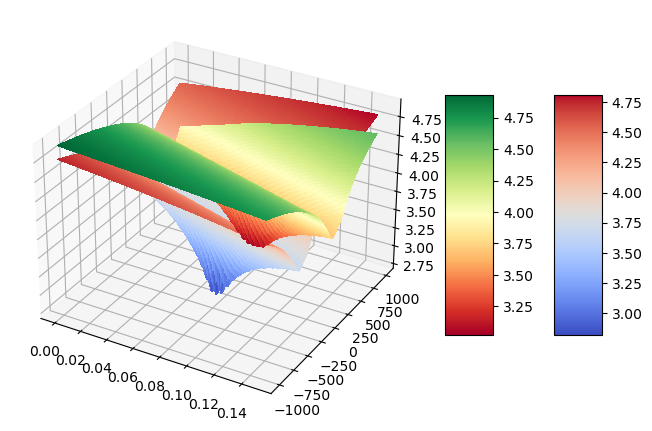

In [12]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
# ax = fig.gca(projection='3d')

plot(X_a, y_a, plt.cm.coolwarm)
plot(X_e, y_e, plt.cm.RdYlGn)

plt.show()